## By Adrian Abeyta and Noemi Turner

In [60]:
import importlib
import numpy as np

import utils
importlib.reload(utils)
import plot_utils as pu
importlib.reload(pu)
from mysklearn import myutils
importlib.reload(myutils)
from mypytable import MyPyTable
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [3]:
data = MyPyTable()
data.load_from_file("input_data/forbes_data.csv")

# Clean Data

In [35]:
num_rows, num_cols = data.get_shape()
data.convert_to_numeric()
y_data = utils.discritize_data_by_million(data)


# Split Data

In [40]:
col = utils.get_column(data.data, data.column_names, "earnings_($ million)")
X_train, X_test, y_train, y_test = myevaluation.train_test_split(col, y_data)

# KNN Classifier

In [45]:
nbc = MyNaiveBayesClassifier()
print(y_train)
nbc.fit([X_train], y_train)
y_pred = nbc.predict(X_test)


['low', 'medium', 'high', 'high', 'low', 'medium', 'high', 'low', 'medium', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'high', 'medium', 'high', 'low', 'low', 'high', 'medium', 'medium', 'low', 'high', 'high', 'high', 'high', 'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high', 'low', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'medium', 'medium', 'low', 'high', 'medium', 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'low', 'medium', 'high', 'medium', 'medium', 'high', 'medium', 'low', 'medium', 'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low', 'high', 'medium', 'medium', 'low', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'high', 'low', 'medium', 'high', 'high', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'low', 'low', 'medium', 'high', 'high', 'low', 'medium',

IndexError: list index out of range

# Map Data

soccer
basketball
basketball
basketball
basketball
boxing
cycling
boxing
golf
boxing
baseball
boxing
american football
golf
basketball
auto racing
auto racing
basketball
golf
f1 racing
basketball
basketball
f1 racing
american football
soccer
tennis
soccer
american football
basketball
golf
basketball
auto racing
basketball
basketball
basketball
golf
boxing
tennis
auto racing
boxing
f1 motorsports
soccer
american football
golf
nascar
tennis
soccer
boxing
soccer
f1 racing
basketball
boxing
boxing
boxing
golf
american football
boxing
basketball
basketball
basketball
golf
tennis
auto racing
ice hockey
soccer
basketball
golf
soccer
basketball
soccer
boxing
auto racing
basketball
golf
basketball
f1 motorsports
golf
golf
basketball
tennis
tennis
f1 motorsports
boxing
basketball
boxing
basketball
tennis
soccer
boxing
basketball
soccer
basketball
hockey
motorcycle gp
american football / baseball
f1 racing
auto racing
boxing
soccer
golf
basketball
tennis
basketball
boxing
basketball
basketball
ba

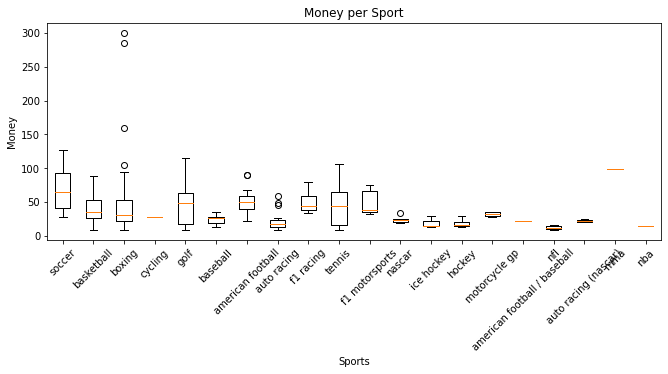

In [61]:
data.remove_rows_with_missing_values()
#print(table.data)
sports = data.get_column("Sport")
money = data.get_column("earnings_($ million)")
for i in range(len(sports)):
    sports[i] = sports[i].lower()
sports_split = utils.split_string_count(sports)
unique_sports = utils.get_genres(sports_split)
total_scores = utils.divide_ratings(unique_sports, sports, money)
print(unique_sports)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_sports, "Sports", "Money", "Money per Sport")